## Como funciona um Projeto de Ciência de dados na prática

1. Entendimento do desafio que você quer resolver
2. Entendimento da Empresa/ Área
3. Extração/ Obtenção de dados
4. Ajustes de dados (Limpesa de dados)
5. Análise Explorátoria
6. Modelagem + Algoritmos
7. Interpretação dos Resultados
8. Deploy/ Produção

## Objetivo

Construir um modelo de previsão de preço que permita uma pessoa comum que possui um imóvel possa saber quanto deve cobrar pela diária do seu imóvel.

Ou ainda, para o locador comum, dado o imóvel que ele está buscando, ajudar a saber se aquele imóvel está com preço atrativo (abaixo da média pra imóveis com as mesmas características) ou não.

## Expectativas Iniciais

- Acredito que a sazonalidade pode ser um fator importante, visto que meses como dezembro costumam ser bem caros no RJ.
- A localização do imóvel deve fazer muita diferença no preço, já que no Rio de Janeiro a localizaçao pode mudar completamente aas características do lugar (segurança, beleza natural, pontos turísticos)
- Adicionais de comodidade podem ter um impacto significativo, visto que temos muitos prédios e casas antigos no Rio de Janeiro.

Vamos descobrir quanto esses fatores impactam e se temos outros fatores não tão intuitivos que são extremamente importantes.


In [2]:
import pandas as pd
import pathlib


In [23]:
meses = {'jan': 1, 'fev':2, 'mar':3, 'abr': 4, 'mai':5, 'jun': 6, 'jul': 7, 'ago': 8, 'set': 9, 'out': 10, 'nov': 11, 'dez': 12}

caminho_bases = pathlib.Path('dataset')

base_airbnb = pd.DataFrame()

for arquivo in caminho_bases.iterdir():
    nome_mes = arquivo.name[:3]
    mes = meses[nome_mes]
    
    ano = arquivo.name[-8:]
    ano = int(ano.replace('.csv', ''))
    
    df = pd.read_csv(caminho_bases / arquivo.name, low_memory=False)
    df['ano'] = ano
    df['mes'] = mes
    base_airbnb = base_airbnb.append(df)

display(base_airbnb)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,number_of_reviews_ltm,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
0,14063,https://www.airbnb.com/rooms/14063,20180414160018,2018-04-14,Living in a Postcard,"Besides the most iconic's view, our apartment ...",NaN,"Besides the most iconic's view, our apartment ...",none,Best and favorite neighborhood of Rio. Perfect...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,17878,https://www.airbnb.com/rooms/17878,20180414160018,2018-04-14,Very Nice 2Br - Copacabana - WiFi,Please note that special rates apply for New Y...,- large balcony which looks out on pedestrian ...,Please note that special rates apply for New Y...,none,This is the best spot in Rio. Everything happe...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,24480,https://www.airbnb.com/rooms/24480,20180414160018,2018-04-14,Nice and cozy near Ipanema Beach,My studio is located in the best of Ipanema. ...,The studio is located at Vinicius de Moraes St...,My studio is located in the best of Ipanema. ...,none,"The beach, the lagoon, Ipanema is a great loca...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,25026,https://www.airbnb.com/rooms/25026,20180414160018,2018-04-14,Beautiful Modern Decorated Studio in Copa,"Our apartment is a little gem, everyone loves ...",This newly renovated studio (last renovations ...,"Our apartment is a little gem, everyone loves ...",none,Copacabana is a lively neighborhood and the ap...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,31560,https://www.airbnb.com/rooms/31560,20180414160018,2018-04-14,NICE & COZY 1BDR - IPANEMA BEACH,This nice and clean 1 bedroom apartment is loc...,This nice and clean 1 bedroom apartment is loc...,This nice and clean 1 bedroom apartment is loc...,none,Die Nachbarschaft von Ipanema ist super lebend...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34324,38844730,https://www.airbnb.com/rooms/38844730,20190923212307,2019-09-24,TRANSAMERICA BARRA DA TIJUCA R IV,"Em estilo contemporâneo, o Transamerica Prime ...",NaN,"Em estilo contemporâneo, o Transamerica Prime ...",none,NaN,...,1.0,1.0,1125.0,1125.0,1.0,1125.0,0.0,15.0,0.0,0.0
34325,38846408,https://www.airbnb.com/rooms/38846408,20190923212307,2019-09-24,Alugo para o Rock in Rio,"Confortável apartamento, 2 quartos , sendo 1 s...",O apartamento estará com mobília completa disp...,"Confortável apartamento, 2 quartos , sendo 1 s...",none,"Muito próximo ao Parque Olímpico, local do eve...",...,2.0,2.0,1125.0,1125.0,2.0,1125.0,0.0,1.0,0.0,0.0
34326,38846703,https://www.airbnb.com/rooms/38846703,20190923212307,2019-09-24,Apt COMPLETO em COPACABANA c/TOTAL SEGURANÇA,Apartamento quarto e sala COMPLETO para curtas...,Espaço ideal para até 5 pessoas. Cama de casal...,Apartamento quarto e sala COMPLETO para curtas...,none,NaN,...,3.0,3.0,1125.0,1125.0,3.0,1125.0,0.0,23.0,6.0,0.0
34327,38847050,https://www.airbnb.com/rooms/38847050,20190923212307,2019-09-24,Cobertura Cinematografica,Cobertura alto nivel,NaN,Cobertura alto nivel,none,NaN,...,1.0,1.0,1125.0,1125.0,1.0,1125.0,0.0,1.0,0.0,0.0


In [10]:
print(list(base_airbnb.columns))
base_airbnb.head(1000).to_csv("primeiros_registros.csv",sep=";")

['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary', 'space', 'description', 'experiences_offered', 'neighborhood_overview', 'notes', 'transit', 'access', 'interaction', 'house_rules', 'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_verifications', 'host_has_profile_pic', 'host_identity_verified', 'street', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market', 'smart_location', 'country_code', 'country', 'latitude', 'longitude', 'is_location_exact', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'square_feet', 'price', 'weekly_price', 'monthly_price', '

- Abri o aquivo primeiros_registros.csv e analisei cada coluna e excluir aquelas que não são relevantes para analise dos dados.
- As colunas resultante são essas listadas abaixo.

In [36]:
colunas = ['host_response_time', 'host_response_rate', 'host_is_superhost', 'host_listings_count', 'host_total_listings_count', 'host_has_profile_pic', 'host_identity_verified', 'latitude', 'longitude', 'is_location_exact', 'property_type', 'room_type', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type', 'amenities', 'price', 'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people', 'number_of_reviews', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'instant_bookable', 'is_business_travel_ready', 'cancellation_policy', 'calculated_host_listings_count', 'reviews_per_month', 'ano', 'mes']
base_airbnb = base_airbnb.loc[:,colunas]
display(base_airbnb)

KeyError: "Passing list-likes to .loc or [] with any missing labels is no longer supported. The following labels were missing: Index(['host_response_time', 'host_response_rate', 'security_deposit',\n       'cleaning_fee', 'review_scores_rating',\n       ...\n       'review_scores_checkin', 'review_scores_communication',\n       'review_scores_location', 'review_scores_value', 'reviews_per_month'],\n      dtype='object', length=12). See https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike"

### Tratar valores faltantes

- Visualizando os dados, percebemos que existe uma grande disparidade em dados faltantes. As colunas com mais de 300.000 valores NaN foram excluídas da análise.
- Para as outras colunas, como temos muitos dados (mais de 900.000 linhas) vamos excluir aslinhas que contém dados NaN

In [26]:
base_airbnb.isnull().sum()

host_response_time                302492
host_response_rate                302495
host_is_superhost                    401
host_listings_count                  401
host_total_listings_count            401
host_has_profile_pic                 401
host_identity_verified               401
latitude                               0
longitude                              0
is_location_exact                      0
property_type                          0
room_type                              0
accommodates                           0
bathrooms                           1282
bedrooms                             613
beds                                1668
bed_type                               0
amenities                              0
price                                  0
security_deposit                  321183
cleaning_fee                      238678
guests_included                        0
extra_people                           0
number_of_reviews                      0
review_scores_ra

In [27]:
# excluindo as colunas com valores nulos 
for coluna in base_airbnb:
    if base_airbnb[coluna].isnull().sum() > 230000:
        base_airbnb = base_airbnb.drop(columns=coluna,axis=1)

base_airbnb.isnull().sum()

host_is_superhost                  401
host_listings_count                401
host_total_listings_count          401
host_has_profile_pic               401
host_identity_verified             401
latitude                             0
longitude                            0
is_location_exact                    0
property_type                        0
room_type                            0
accommodates                         0
bathrooms                         1282
bedrooms                           613
beds                              1668
bed_type                             0
amenities                            0
price                                0
guests_included                      0
extra_people                         0
number_of_reviews                    0
instant_bookable                     0
is_business_travel_ready             0
cancellation_policy                  0
calculated_host_listings_count       0
ano                                  0
mes                      

In [28]:
base_airbnb = base_airbnb.dropna()
print(base_airbnb.shape)
base_airbnb.isnull().sum()

(681293, 26)


host_is_superhost                 0
host_listings_count               0
host_total_listings_count         0
host_has_profile_pic              0
host_identity_verified            0
latitude                          0
longitude                         0
is_location_exact                 0
property_type                     0
room_type                         0
accommodates                      0
bathrooms                         0
bedrooms                          0
beds                              0
bed_type                          0
amenities                         0
price                             0
guests_included                   0
extra_people                      0
number_of_reviews                 0
instant_bookable                  0
is_business_travel_ready          0
cancellation_policy               0
calculated_host_listings_count    0
ano                               0
mes                               0
dtype: int64

### Verificar os dados em cada coluna

In [29]:
print(base_airbnb.dtypes)
print("-"*80)
print(base_airbnb.iloc[0])

host_is_superhost                  object
host_listings_count               float64
host_total_listings_count         float64
host_has_profile_pic               object
host_identity_verified             object
latitude                          float64
longitude                         float64
is_location_exact                  object
property_type                      object
room_type                          object
accommodates                        int64
bathrooms                         float64
bedrooms                          float64
beds                              float64
bed_type                           object
amenities                          object
price                              object
guests_included                     int64
extra_people                       object
number_of_reviews                   int64
instant_bookable                   object
is_business_travel_ready           object
cancellation_policy                object
calculated_host_listings_count    

Como a coluna _price_ e _extra_people_ são reconhecidos como objeto, devemos mudar o tipo de varável da coluna.

In [30]:
#price
base_airbnb['price'] = base_airbnb['price'].str.replace('$', '')
base_airbnb['price'] = base_airbnb['price'].str.replace(',', '')
base_airbnb['price'] = base_airbnb['price'].astype(np.float32, copy=False)
#extra people
base_airbnb['extra_people'] = base_airbnb['extra_people'].str.replace('$', '')
base_airbnb['extra_people'] = base_airbnb['extra_people'].str.replace(',', '')
base_airbnb['extra_people'] = base_airbnb['extra_people'].astype(np.float32, copy=False)
#verificando os tipos
display(base_airbnb.dtypes)

<ipython-input-30-b63aea842812>:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  base_airbnb['price'] = base_airbnb['price'].str.replace('$', '')
<ipython-input-30-b63aea842812>:6: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will*not* be treated as literal strings when regex=True.
  base_airbnb['extra_people'] = base_airbnb['extra_people'].str.replace('$', '')


host_is_superhost                  object
host_listings_count               float64
host_total_listings_count         float64
host_has_profile_pic               object
host_identity_verified             object
latitude                          float64
longitude                         float64
is_location_exact                  object
property_type                      object
room_type                          object
accommodates                        int64
bathrooms                         float64
bedrooms                          float64
beds                              float64
bed_type                           object
amenities                          object
price                             float32
guests_included                     int64
extra_people                      float32
number_of_reviews                   int64
instant_bookable                   object
is_business_travel_ready           object
cancellation_policy                object
calculated_host_listings_count    

## Analise Exploratória e Tratar Outliers

1. Ver a correlação entre as features e decidir se mantemos todas as features que temos
2. Excluir outliers 
    - Valores abaixo de Q1 - 1,5*Aplitude
    - Valores acima de Q3 + 1,5*Amplitude
    - Amplitude = Q3 - Q1
3. Confirmar se todas as features fazem realmente sentido para o nosso modelo ou se alguma delas nào vai nos ajudar e se devemos excluir.

In [31]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


<AxesSubplot:>

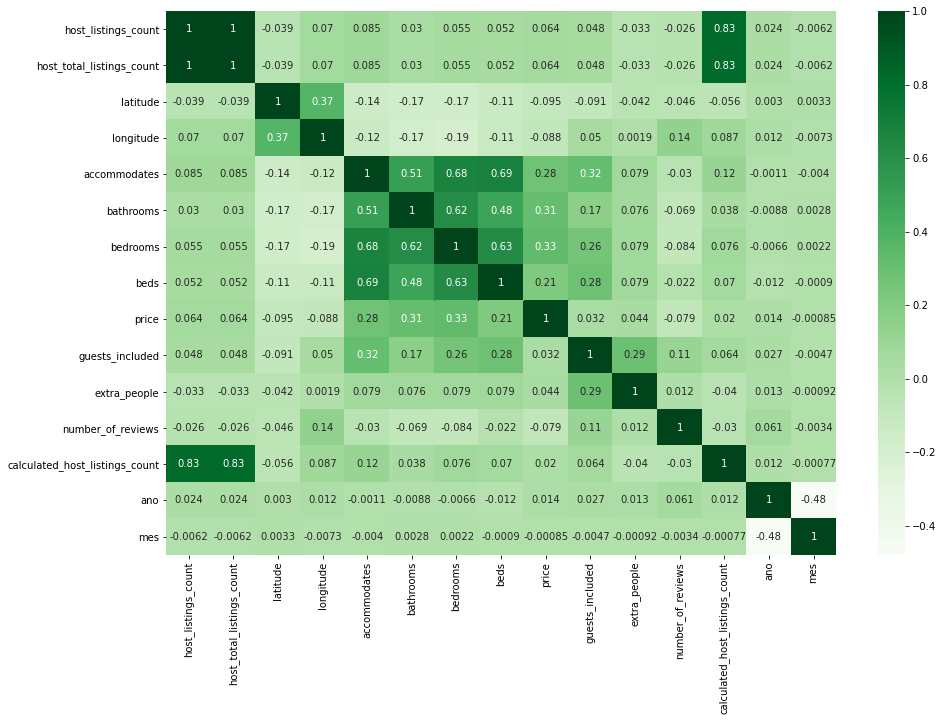

In [32]:
# Analisando as correlaçòes entre as informaçòes
plt.figure(figsize=(15,10))
sns.heatmap(base_airbnb.corr(), annot=True, cmap="Greens")

## Definição de funções para análise de Outliers


In [33]:
def limites(coluna):
    q1 = coluna.quantile(0.25)
    q3 = coluna.quantile(0.75)
    amplitude = q3 - q1
    return (q1 - 1.5 * amplitude, q3 + 1.5 * amplitude)

def excluir_outliers(df, nome_coluna):
    qtde_linhas = df.shape[0]
    lim_inf, lim_sup = limites(df[nome_coluna])
    df = df.loc[(df[nome_coluna] >= lim_inf) & (df[nome_coluna] <= lim_sup), :]
    linhas_removidas = qtde_linhas - df.shape[0]
return df, linhas_removidas

def diagrama_caixa(coluna):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(15, 5)
    sns.boxplot(x=coluna, ax=ax1)
    ax2.set_xlim(limites(coluna))
    sns.boxplot(x=coluna, ax=ax2)
    
def histograma(coluna):
    plt.figure(figsize=(15, 5))
    sns.distplot(coluna, hist=True)
    
def grafico_barra(coluna):
    plt.figure(figsize=(15, 5))
    ax = sns.barplot(x=coluna.value_counts().index, y=coluna.value_counts())
    ax.set_xlim(limites(coluna))

### Price

C:\Users\felipe\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


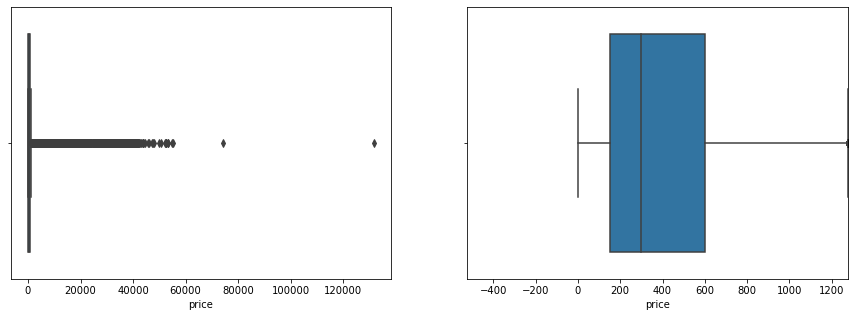

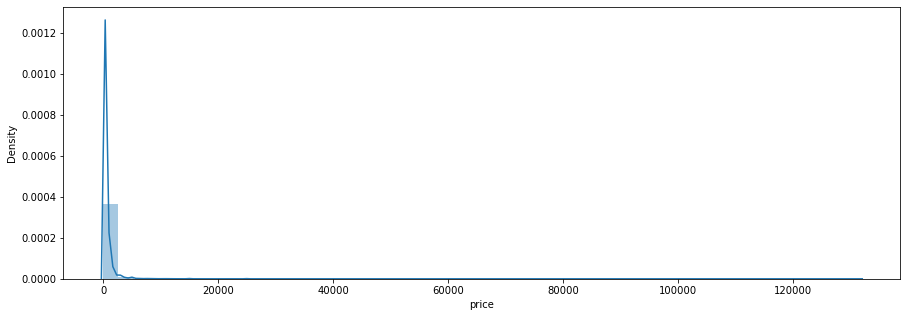

In [34]:
diagrama_caixa(base_airbnb["price"])
histograma(base_airbnb["price"])

Como estamos construindo um modelo para imóveis comuns, acredito que os valores acima do limite superior serão apenas de apartamentos de altíssimo luxo, que não é o nosso objetivo
principal. Por isso, podemos excluir esses outliers.

In [20]:
# base_airbnb, linhas_removidas = excluir_outliers(base_airbnb,"price")
# print(f"{linhas_removidas} linhas foram removidas")

681293 linhas foram removidas


C:\Users\felipe\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


(681293, 26)


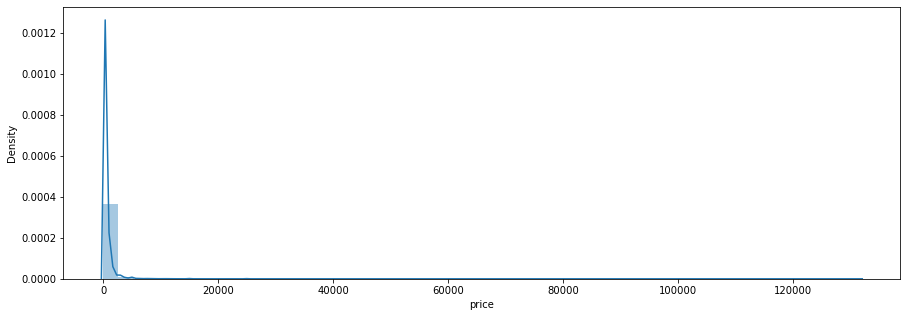

In [35]:
histograma(base_airbnb['price'])
print(base_airbnb.shape)